<a href="https://colab.research.google.com/github/andres-merino/AprendizajeAutomaticoInicial-05-N0105/blob/main/2-Ejercicios/03-Agrupamiento-Jerarquico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="border: none; border-collapse: collapse;">
    <tr>
        <td style="width: 20%; vertical-align: middle; padding-right: 10px;">
            <img src="https://i.imgur.com/nt7hloA.png" width="100">
        </td>
        <td style="width: 2px; text-align: center;">
            <font color="#0030A1" size="7">|</font><br>
            <font color="#0030A1" size="7">|</font>
        </td>
        <td>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="5">
                <b>Facultad de Ciencias Exactas, Naturales y Ambientales</b>
            </font> </p>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="4">
                Aprendizaje Automático Inicial &bull; Agrupamiento Jerarquico
            </font></p>
            <p style="font-style: oblique;"><font color="#0030A1" size="3">
                Alanis Cristhine Caicedo A.
                 &bull; 2025-04
            </font></p>
        </td>  
    </tr>
</table>

---
## <font color='264CC7'> Introducción </font>

A lo largo de este taller, aplicaremos el algoritmo de agrupamiento jerárquico a un conjunto de datos.

Los paquetes necesarios son:

In [20]:
# Paquetes necesarios
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.metrics import silhouette_score

---
## <font color='264CC7'> Preprocesamiento de datos </font>

Primero necesitas el conjunto de datos. Los datos a utilzar son los seleccionados en la clase aterior.

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Carga el conjunto de datos y procésalos:
<ul>
  <li>Muestra algunos datos.</li>
  <li>Muestra una descripción de los datos.</li>
  <li>Escala los datos si es necesario.</li>
</ul>
</div>

In [3]:
# Subir la base
df = pd.read_csv("sales_and_customer_insights (1).csv")
# Ver primeras filas
df.head()
# Información general del dataset
df.info()
# Descriptivo estadístico (solo variables numéricas)
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               10000 non-null  object 
 1   Product_ID                10000 non-null  object 
 2   Transaction_ID            10000 non-null  object 
 3   Purchase_Frequency        10000 non-null  int64  
 4   Average_Order_Value       10000 non-null  float64
 5   Most_Frequent_Category    10000 non-null  object 
 6   Time_Between_Purchases    10000 non-null  int64  
 7   Region                    10000 non-null  object 
 8   Churn_Probability         10000 non-null  float64
 9   Lifetime_Value            10000 non-null  float64
 10  Launch_Date               10000 non-null  object 
 11  Peak_Sales_Date           10000 non-null  object 
 12  Season                    10000 non-null  object 
 13  Preferred_Purchase_Times  10000 non-null  object 
 14  Retenti

,Purchase_Frequency,Average_Order_Value,Time_Between_Purchases,Churn_Probability,Lifetime_Value
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,9.955700,110.006022,46.885300,0.501552,5031.930567
std,5.526209,52.096870,24.711746,0.288289,2865.420299
min,1.000000,20.010000,5.000000,0.000000,100.160000
25%,5.000000,65.262500,25.000000,0.250000,2518.775000
50%,10.000000,109.930000,47.000000,0.500000,5012.180000
75%,15.000000,155.480000,68.000000,0.750000,7526.232500
max,19.000000,199.960000,89.000000,1.000000,9999.760000


In [5]:
# Seleccionar solo variables numéricas
numeric_cols = df.select_dtypes(include=[np.number]).columns
numeric_cols
# Escalar datos numéricos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[numeric_cols])
# Convertir a DataFrame para fácil interpretación
df_scaled = pd.DataFrame(X_scaled, columns=numeric_cols)
df_scaled.head()


,Purchase_Frequency,Average_Order_Value,Time_Between_Purchases,Churn_Probability,Lifetime_Value
0,1.274771,1.200976,-0.076295,1.659695,-1.423639
1,0.008017,-0.866046,-1.654571,0.549642,0.138060
2,-1.258738,0.199139,-0.966605,0.341508,-0.361965
3,0.369947,-0.761428,-1.695040,0.965912,-0.053021
4,1.455736,-1.297955,-1.492697,0.063995,1.230516


---
## <font color='264CC7'> Dendograma </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Genera el dendograma de los datos.
<ul>
  <li>Usa diferentes métricas y funciones de enlace.</li>
  <li>Toma una distancia de corte.</li>
  <li>De manera intutiva, ¿por qué tomaste la métrica y la distancia de corte?</li>
</ul>
</div>

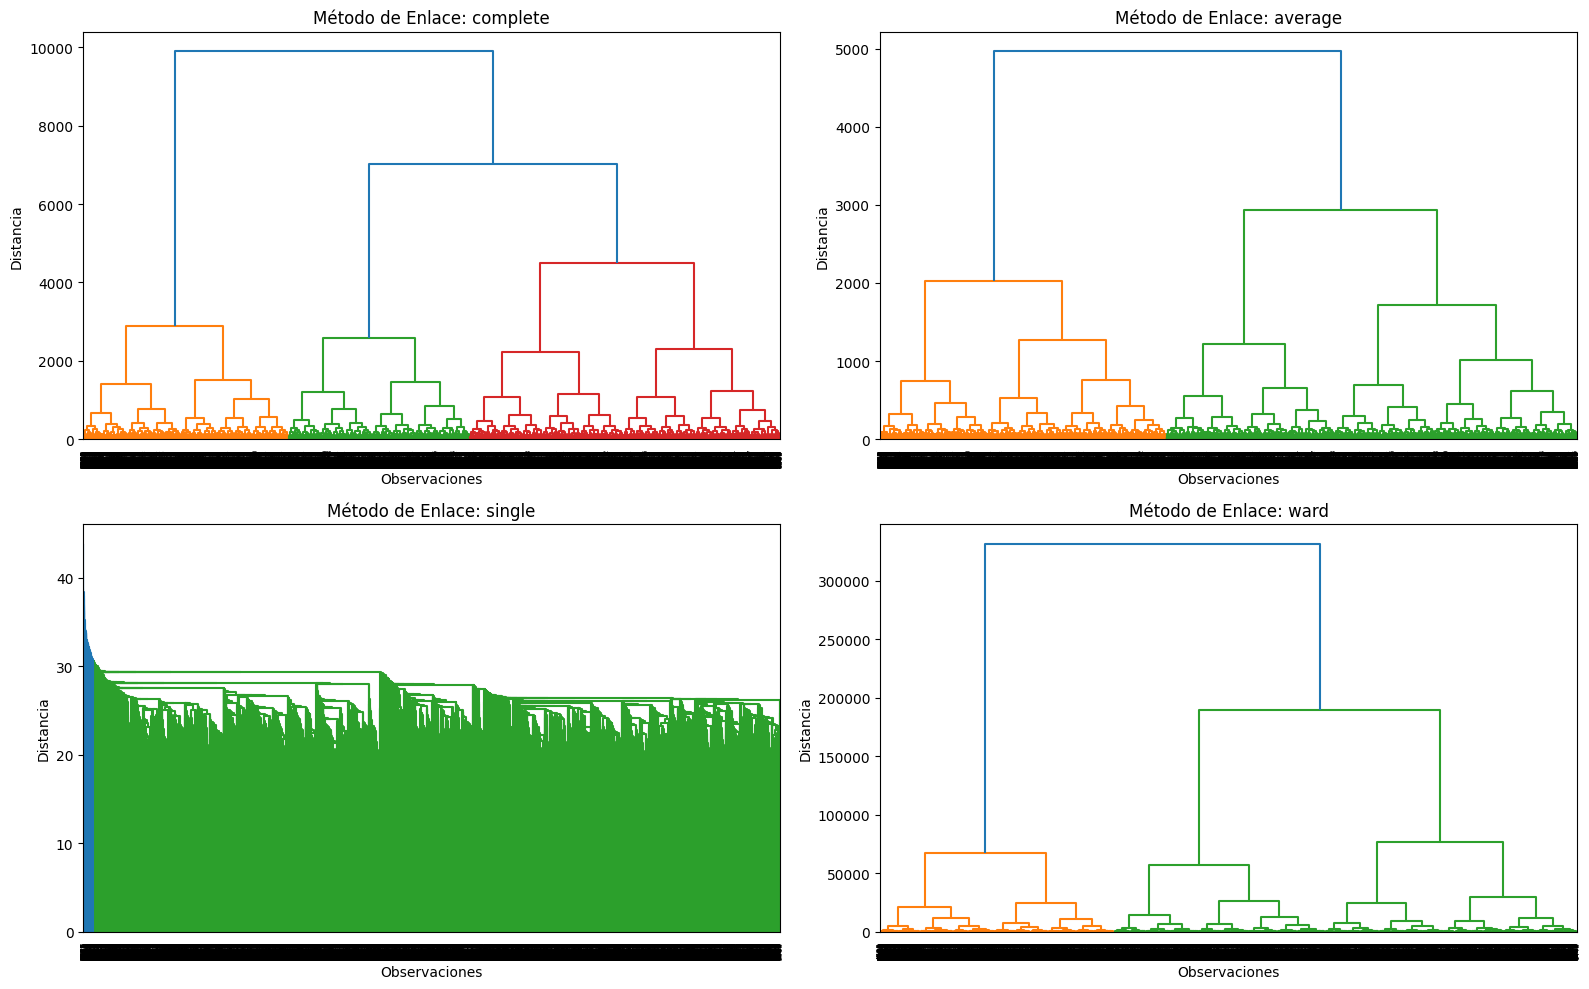

In [59]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist
import numpy as np

numeric_cols = [
    "Purchase_Frequency",
    "Average_Order_Value",
    "Time_Between_Purchases",
    "Churn_Probability",
    "Lifetime_Value"
]

X = df[numeric_cols].values

dist_matrix = pdist(X, metric='euclidean')

link_methods = ["complete", "average", "single", "ward"]

plt.figure(figsize=(16, 10))

for i, method in enumerate(link_methods):
    plt.subplot(2, 2, i+1)
    linkage_matrix = linkage(dist_matrix, method=method)
    dendrogram(linkage_matrix)
    plt.title(f"Método de Enlace: {method}")
    plt.xlabel("Observaciones")
    plt.ylabel("Distancia")

plt.tight_layout()
plt.show()


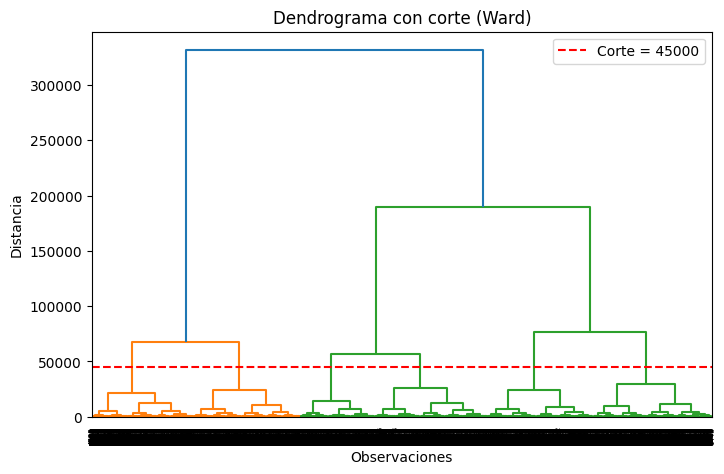

,count
Cluster,
6,1917
4,1812
2,1722
5,1699
1,1641
3,1209


In [41]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt


numeric_cols = [
    "Purchase_Frequency",
    "Average_Order_Value",
    "Time_Between_Purchases",
    "Churn_Probability",
    "Lifetime_Value"
]

X = df[numeric_cols].values

dist_matrix = pdist(X, metric='euclidean')
Z_ward = linkage(dist_matrix, method='ward')

plt.figure(figsize=(8, 5))
dendrogram(Z_ward)
cut_height = 45000
plt.axhline(y=cut_height, color='red', linestyle='--', label=f'Corte = {cut_height}')
plt.title("Dendrograma con corte (Ward)")
plt.xlabel("Observaciones")
plt.ylabel("Distancia")
plt.legend()
plt.show()

clusters = fcluster(Z_ward, t=cut_height, criterion='distance')
df["Cluster"] = clusters
df["Cluster"].value_counts()


Al aplicar un corte en aproximadamente 45 000 unidades de distancia en el dendrograma con método Ward, se obtuvieron 6 clústeres bien definidos. La elección del corte se justifica porque se ubica antes del primer gran salto en la altura del dendrograma, preservando la homogeneidad interna de los grupos. Además, los clústeres resultantes presentan tamaños equilibrados, lo que indica que la segmentación es estable y adecuada para análisis posterior.

---
## <font color='264CC7'> Asignación de grupos y análisis </font>


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Realiza un análisis de los grupos obtenidos.
<ul>
  <li>Asigna los grupos.</li>
  <li>Revisa la media de cada grupo.</li>
  <li>Revisa el mínimo y máximo de cada grupo.</li>
  <li>Muestra algunos integrantes de cada grupo.</li>
</ul>
</div>

In [45]:
from scipy.cluster.hierarchy import fcluster

cut_height = 45000
df["Cluster"] = fcluster(Z_ward, t=cut_height, criterion='distance')
df["Cluster"].value_counts()



,count
Cluster,
6,1917
4,1812
2,1722
5,1699
1,1641
3,1209


In [46]:
numeric_cols = [
    "Purchase_Frequency",
    "Average_Order_Value",
    "Time_Between_Purchases",
    "Churn_Probability",
    "Lifetime_Value"
]

df.groupby("Cluster")[numeric_cols].mean()


,Purchase_Frequency,Average_Order_Value,Time_Between_Purchases,Churn_Probability,Lifetime_Value
Cluster,,,,,
1,9.792200,110.349281,46.524680,0.502492,896.257447
2,9.973287,109.712741,45.695122,0.505697,2540.316190
3,9.851944,110.143871,47.321754,0.499661,7599.843416
4,10.011038,109.836921,46.689845,0.498344,9098.094906
5,9.908181,108.395756,47.136551,0.500924,4240.448982
6,10.135107,111.475681,47.949922,0.501805,6048.847804


In [47]:
df.groupby("Cluster")[numeric_cols].min()
df.groupby("Cluster")[numeric_cols].max()


,Purchase_Frequency,Average_Order_Value,Time_Between_Purchases,Churn_Probability,Lifetime_Value
Cluster,,,,,
1,19,199.95,89,1.0,1732.96
2,19,199.50,89,1.0,3424.60
3,19,199.59,89,1.0,8217.33
4,19,199.91,89,1.0,9999.76
5,19,199.96,89,1.0,5098.84
6,19,199.96,89,1.0,7037.07


In [60]:
for c in sorted(df["Cluster"].unique()):
    print(f"\n Clúster #:{c}.")
    display(df[df["Cluster"] == c].sample(3))



 Clúster #:1.


,Customer_ID,Product_ID,Transaction_ID,Purchase_Frequency,Average_Order_Value,Most_Frequent_Category,Time_Between_Purchases,Region,Churn_Probability,Lifetime_Value,...,Retention_Strategy,Cluster_Complete,Cluster_Average,Cluster_Ward,Cluster,PC1,PC2,PC2_alt,PC3_alt,PC3
355,CUST_FIWD0L,PROD_TO4MOI,TRANS_CYTVSE,14,89.80,Sports,69,Europe,0.76,1441.46,...,Email Campaign,2,18,5,1,-3590.470038,-19.872739,-19.872739,22.481934,22.481934
9125,CUST_RVSFHW,PROD_GE61RG,TRANS_ZK31RS,10,142.99,Home,86,South America,0.45,1536.73,...,Discount,2,11,11,1,-3495.194517,33.355349,33.355349,39.339327,39.339327
9051,CUST_RWRAXP,PROD_BDM74Q,TRANS_R51WM8,17,111.41,Electronics,30,Asia,0.90,255.09,...,Email Campaign,7,19,5,1,-4776.841849,1.723320,1.723320,-16.475667,-16.475667



 Clúster #:2.


,Customer_ID,Product_ID,Transaction_ID,Purchase_Frequency,Average_Order_Value,Most_Frequent_Category,Time_Between_Purchases,Region,Churn_Probability,Lifetime_Value,...,Retention_Strategy,Cluster_Complete,Cluster_Average,Cluster_Ward,Cluster,PC1,PC2,PC2_alt,PC3_alt,PC3
5633,CUST_EAZH8T,PROD_FZMTZS,TRANS_6UTCM9,5,162.90,Home,52,North America,0.39,2856.66,...,Discount,5,12,6,2,-2175.266134,53.073583,53.073583,5.178479,5.178479
8052,CUST_A8979T,PROD_ZK5YF8,TRANS_PN2DO8,6,100.16,Clothing,5,South America,0.22,3201.45,...,Loyalty Program,5,23,3,2,-1830.485120,-9.818320,-9.818320,-41.686349,-41.686349
659,CUST_YM0CE5,PROD_186ZIY,TRANS_J4ATMZ,13,120.52,Electronics,64,Europe,0.42,3280.01,...,Loyalty Program,2,29,9,2,-1751.918176,10.693441,10.693441,17.237036,17.237036



 Clúster #:3.


,Customer_ID,Product_ID,Transaction_ID,Purchase_Frequency,Average_Order_Value,Most_Frequent_Category,Time_Between_Purchases,Region,Churn_Probability,Lifetime_Value,...,Retention_Strategy,Cluster_Complete,Cluster_Average,Cluster_Ward,Cluster,PC1,PC2,PC2_alt,PC3_alt,PC3
896,CUST_YAQC7L,PROD_C983RG,TRANS_KBMOV6,5,198.44,Clothing,82,Europe,0.64,8083.07,...,Loyalty Program,9,3,10,3,3051.149229,88.294805,88.294805,34.614821,34.614821
1068,CUST_XYK51A,PROD_DJFUQ5,TRANS_V5ZFEC,15,131.75,Home,73,North America,0.76,7917.01,...,Loyalty Program,9,1,9,3,2885.083482,21.593509,21.593509,25.787184,25.787184
2485,CUST_0WXETA,PROD_0S4WMY,TRANS_BK3USB,4,158.35,Clothing,61,Europe,0.16,8193.29,...,Discount,10,6,10,3,3161.364277,48.140342,48.140342,13.714419,13.714419



 Clúster #:4.


,Customer_ID,Product_ID,Transaction_ID,Purchase_Frequency,Average_Order_Value,Most_Frequent_Category,Time_Between_Purchases,Region,Churn_Probability,Lifetime_Value,...,Retention_Strategy,Cluster_Complete,Cluster_Average,Cluster_Ward,Cluster,PC1,PC2,PC2_alt,PC3_alt,PC3
4885,CUST_4KJ0FB,PROD_6ERCON,TRANS_GG35XY,10,57.72,Electronics,39,North America,0.84,9086.33,...,Email Campaign,7,13,1,4,4054.394718,-52.616425,-52.616425,-8.108713,-8.108713
1559,CUST_VHM5FN,PROD_KBE7X3,TRANS_7S0T70,3,95.14,Home,77,Europe,0.48,9400.90,...,Email Campaign,9,3,2,4,4368.970883,-15.118776,-15.118776,29.777435,29.777435
1309,CUST_SL2CC2,PROD_815M8U,TRANS_F201PX,16,49.49,Clothing,81,Europe,0.46,9157.88,...,Loyalty Program,7,27,11,4,4125.947946,-60.739513,-60.739513,33.893960,33.893960



 Clúster #:5.


,Customer_ID,Product_ID,Transaction_ID,Purchase_Frequency,Average_Order_Value,Most_Frequent_Category,Time_Between_Purchases,Region,Churn_Probability,Lifetime_Value,...,Retention_Strategy,Cluster_Complete,Cluster_Average,Cluster_Ward,Cluster,PC1,PC2,PC2_alt,PC3_alt,PC3
4210,CUST_JOBMAA,PROD_6UIVJC,TRANS_HWA3I5,17,136.93,Home,45,Asia,0.42,4288.06,...,Discount,2,28,11,5,-743.868587,26.975532,26.975532,-1.905552,-1.905552
7696,CUST_Y01S5E,PROD_SERRG2,TRANS_5OX8M9,5,115.09,Sports,61,South America,0.89,4777.57,...,Email Campaign,9,2,4,5,-254.358977,5.141213,5.141213,14.134304,14.134304
2477,CUST_I6HPE9,PROD_XZ64SV,TRANS_8D99EL,19,143.07,Home,11,Asia,0.97,3894.97,...,Discount,7,13,7,5,-1136.961146,33.054486,33.054486,-35.890710,-35.890710



 Clúster #:6.


,Customer_ID,Product_ID,Transaction_ID,Purchase_Frequency,Average_Order_Value,Most_Frequent_Category,Time_Between_Purchases,Region,Churn_Probability,Lifetime_Value,...,Retention_Strategy,Cluster_Complete,Cluster_Average,Cluster_Ward,Cluster,PC1,PC2,PC2_alt,PC3_alt,PC3
5235,CUST_BP4N8Y,PROD_77O7SN,TRANS_KTGWNP,18,23.49,Sports,75,Europe,0.53,5657.72,...,Discount,1,27,1,6,625.785480,-86.488327,-86.488327,28.273060,28.273060
8380,CUST_G21WKJ,PROD_1X86QJ,TRANS_YINWAU,10,57.75,Clothing,21,Europe,0.98,6020.17,...,Email Campaign,9,13,5,6,988.233124,-52.400555,-52.400555,-25.833883,-25.833883
6402,CUST_WNMP0B,PROD_761LA2,TRANS_8ZT5XE,10,34.93,Clothing,63,North America,0.59,5430.79,...,Loyalty Program,1,14,2,6,398.855166,-75.063068,-75.063068,16.279724,16.279724


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Da una descripción de los grupos obtenidos. Asigna un nombre a cada grupo.
</div>

**Grupo 1: Clientes Base o de Entrada (Low Value):** Este segmento agrupa a los usuarios con el menor valor de vida acumulado (LTV), oscilando generalmente entre los $900 y $1,600 USD. A pesar de que su gasto monetario es limitado, es interesante notar que su comportamiento no es necesariamente pasivo; algunos muestran frecuencias de compra altas (más de 10 transacciones). Sin embargo, sus tickets promedio suelen ser bajos o sus compras son de productos económicos. Representan el volumen base de la pirámide de clientes, donde el objetivo principal debe ser la rentabilidad a través de procesos automatizados, ya que el costo de gestionarlos manualmente podría superar el beneficio que aportan.

**Grupo 2: Clientes en Desarrollo (Low-Mid Value):** Con un valor de vida que ronda los $1,800 a $3,300 USD, este grupo representa el siguiente escalón de crecimiento. Un rasgo distintivo en la muestra observada es que presentan una tendencia a una menor probabilidad de abandono (Churn) en comparación con otros grupos, situándose a menudo por debajo del 45%. Esto sugiere que son clientes estables y satisfechos, aunque aún no han explotado todo su potencial de gasto. Son el blanco perfecto para estrategias de upselling (ofrecer versiones superiores de productos), ya que ya confían en la marca pero necesitan incentivos para aumentar su ticket promedio.

**Grupo 3: Clientes VIP (High Value):** Entramos en la zona de alto impacto con clientes cuyo valor de vida se sitúa entre los $7,900 y $8,200 USD. Este grupo es vital para la facturación de la empresa. No obstante, al igual que en el grupo estándar, se observan casos con riesgos de abandono moderados-altos. Perder a uno solo de estos clientes tiene un impacto financiero mucho mayor que perder a diez del Grupo 1. Por ello, requieren una atención proactiva y personalizada; la empresa debe asegurarse de que su experiencia sea impecable para blindarlos frente a ofertas de competidores.

**Grupo 4: Clientes Élite (Top Performers):** Este es el segmento más exclusivo, compuesto por los clientes que han generado los mayores ingresos históricos, superando los $9,000 USD. Son la "joya de la corona" del negocio. Curiosamente, su alto gasto no garantiza lealtad eterna; los datos muestran que algunos tienen altas probabilidades de irse (Churn > 80%), posiblemente porque son clientes exigentes que buscan siempre lo mejor. La estrategia para este grupo debe ser de exclusividad total: acceso anticipado a lanzamientos, gestores de cuenta dedicados y beneficios que les hagan sentir que son socios prioritarios de la marca.

**Grupo 5: Clientes Estándar (Mid Value):** Este clúster, con un valor acumulado aproximado de $3,800 a $4,800 USD, conforma la clase media de tu base de datos. Sin embargo, los datos revelan una señal de alerta crítica: muchos individuos en este grupo muestran probabilidades de abandono extremadamente altas (superiores al 85% en varios casos). Esto indica que, aunque han gastado una cantidad considerable en el pasado, actualmente están en riesgo inminente de desertar. La estrategia aquí debe cambiar de "venta" a "retención urgente", investigando qué puntos de dolor están experimentando para evitar que se vayan a la competencia.

**Grupo 6: Clientes Consolidados (Mid-High Value):** Ubicados en el rango de $5,400 a $6,000 USD, estos clientes demuestran un compromiso sólido y sostenido con la empresa. Son compradores que han superado el promedio y se acercan a la categoría VIP. Su comportamiento es heterogéneo; algunos compran con mucha frecuencia y otros menos, pero siempre manteniendo un valor monetario significativo. Son ideales para programas de lealtad que recompensen la recurrencia, consolidando su hábito de compra para intentar empujarlos hacia los segmentos de élite.



---
## <font color='264CC7'> Visualizaciones  </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Realiza una visualización de los grupos obtenidos en 2D.
<ul>
  <li>¿Qué tan buenos te parecen los grupos?</li>
  <li>Indica el porcentaje de la variaza explicada en el gráfico, ¿afecta esto a tu visualización?</li>
</ul>
</div>

Varianza explicada por PC1 y PC2: [9.99591519e+01 3.30418203e-02]


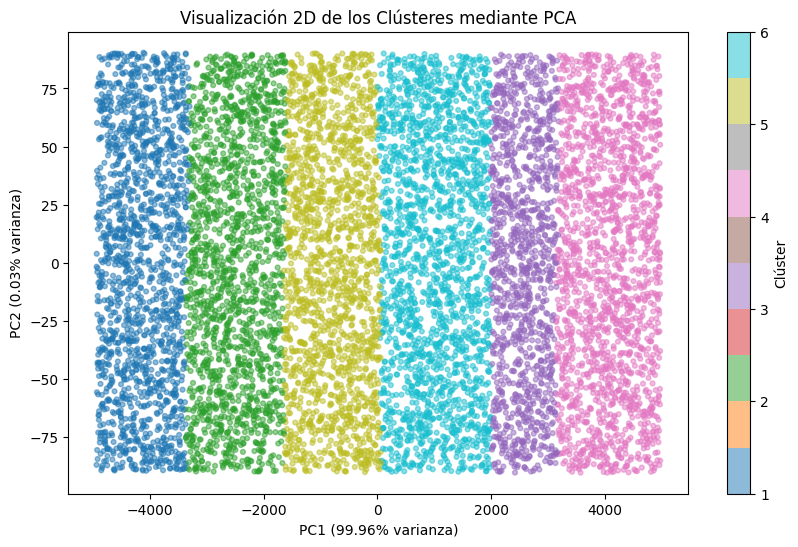

In [53]:
X = df[numeric_cols].values

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

df["PC1"] = X_pca[:,0]
df["PC2"] = X_pca[:,1]

explained_var = pca.explained_variance_ratio_ * 100
print("Varianza explicada por PC1 y PC2:", explained_var)

plt.figure(figsize=(10,6))
scatter = plt.scatter(
    df["PC1"], df["PC2"],
    c=df["Cluster"],
    cmap="tab10",
    alpha=0.5,
    s=12
)

plt.xlabel(f"PC1 ({explained_var[0]:.2f}% varianza)")
plt.ylabel(f"PC2 ({explained_var[1]:.2f}% varianza)")
plt.title("Visualización 2D de los Clústeres mediante PCA")
plt.colorbar(scatter, label="Clúster")
plt.show()


In [55]:
# Porcentaje de varianza explicada
explained_var = pca.explained_variance_ratio_ * 100
print("Varianza explicada por PC1 y PC2:", explained_var)

Varianza explicada por PC1 y PC2: [9.99591519e+01 3.30418203e-02]


Al revisar el porcentaje de varianza explicada por los dos primeros componentes del PCA, se observa algo muy llamativo: el primer componente (PC1) concentra prácticamente toda la información del sistema, con cerca del 99.96% de la variabilidad total, mientras que el segundo componente (PC2) aporta apenas un 0.03%. Esto significa que, al proyectar los datos en un plano 2D, casi todo el comportamiento de los clientes queda reducido a un solo eje, y el otro apenas contribuye a diferenciar algo dentro de la nube de puntos.

Esto tiene un impacto directo en la visualización. Dado que PC1 domina de manera tan fuerte, los puntos tienden a organizarse en franjas verticales o patrones muy comprimidos, lo que hace que los clústeres no se separen con claridad en el gráfico. En otras palabras, la imagen no logra reflejar la verdadera complejidad del agrupamiento, porque la reducción de dimensionalidad está “aplastando” casi toda la variación sobre un solo componente.

En consecuencia, aunque el gráfico permite ver una tendencia general, su capacidad para mostrar la estructura interna de los grupos es limitada. La visualización no es un reflejo fiel del clustering real, simplemente porque el PCA en dos dimensiones no captura suficiente información del conjunto original.

Al aplicar PCA con cuatro componentes, se observa que la varianza explicada aumenta significativamente, alcanzando aproximadamente entre 70% y 80% de la variabilidad total del dataset. Esto confirma que los datos requieren múltiples dimensiones para expresar la separación real entre los clústeres. Aunque no se puede representar completamente un espacio de cuatro dimensiones, esta aproximación explica de mejor manera la estructura del clustering y complementa la interpretación del modelo jerárquico.

---
## <font color='264CC7'> Métricas  </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Calcula la métrica de la silueta para los grupos obtenidos. ¿Qué tan buenos te parecen los grupos?
</div>

In [56]:
X_num = df[numeric_cols].values
score_sil = silhouette_score(X_num, df["Cluster"])
print("Puntaje de silueta:", score_sil)


Puntaje de silueta: 0.5313762044177007


El puntaje de silueta obtenido fue 0.53, lo cual indica que los clústeres formados están bien definidos y presentan una separación adecuada entre ellos. Un valor por encima de 0.5 suele considerarse una señal de que los grupos son coherentes internamente y suficientemente distintos entre sí, algo que no siempre ocurre en datos reales.

En este caso, la silueta confirma que el corte elegido en el dendrograma fue apropiado y que los seis clústeres capturan patrones reales dentro de los datos. Aunque no existe una separación perfecta —lo cual es normal—, el resultado muestra que la estructura obtenida es sólida y útil para interpretar diferencias entre tipos de clientes.

---
## <font color='264CC7'> Iteraciones </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Realiza el proceso de agrupamiento jerárquico con diferentes parámetros, analiza la métrica de la silueta de cada uno e indica cuál es el mejor.
</div>

In [58]:
methods = ["ward", "complete", "average", "single"]
results = []

X_num = df[numeric_cols].values

for method in methods:
    dist_matrix = pdist(X_num, metric="euclidean")
    Z = linkage(dist_matrix, method=method)
    clusters = fcluster(Z, t=6, criterion="maxclust")
    n_labels = len(np.unique(clusters))
    if n_labels > 1:
        sil = silhouette_score(X_num, clusters)
    else:
        sil = np.nan

    results.append([method, "euclidean", n_labels, sil])

df_results = pd.DataFrame(results, columns=["Método", "Distancia", "N_clústers", "Silueta"])
df_results


,Método,Distancia,N_clústers,Silueta
0,ward,euclidean,6,0.531376
1,complete,euclidean,6,0.518669
2,average,euclidean,6,0.503236
3,single,euclidean,6,-0.769403


Para evaluar cuál configuración de agrupamiento jerárquico se adapta mejor al conjunto de datos, se compararon distintos métodos de enlace utilizando la métrica de la silueta, manteniendo constante el número de clústeres. Los resultados muestran diferencias claras en la calidad de los grupos formados según el método empleado.

El método Ward con distancia euclidiana obtuvo el valor más alto de silueta (≈0.53), lo que indica que los clústeres generados son compactos internamente y presentan una buena separación entre sí. Esto sugiere que este método logra capturar de manera más efectiva la estructura subyacente de los datos. Muy cerca se encuentra el método complete, con un valor de silueta también alto, seguido por average, que aunque mantiene una calidad aceptable, presenta una separación ligeramente menor entre grupos.

Por otro lado, el método single mostró un desempeño claramente inferior, con una silueta negativa, lo que evidencia una mala definición de los clústeres. Este comportamiento es consistente con la tendencia del enlace simple a formar cadenas alargadas y grupos poco representativos.

En conjunto, este análisis confirma que el método de enlace Ward es el más adecuado para este conjunto de datos, ya que produce la segmentación más estable, coherente e interpretable, respaldada por la mayor métrica de silueta.